In [114]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [31]:
bl = pd.read_excel('bplm.xlsx')
bl.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [32]:
bl.columns = bl.columns.str.lower()
bl.columns = bl.columns.str.replace(' ','_')

In [33]:
bl.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [34]:
bl.shape

(5000, 14)

In [35]:
bl.isnull().sum()

id                    0
age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

In [36]:
bl.dtypes

id                      int64
age                     int64
experience              int64
income                  int64
zip_code                int64
family                  int64
ccavg                 float64
education               int64
mortgage                int64
personal_loan           int64
securities_account      int64
cd_account              int64
online                  int64
creditcard              int64
dtype: object

In [41]:
bl['zip_code'] = bl['zip_code'].astype(str)
bl['id'] = bl['id'].astype(str)

In [42]:
bl.dtypes

id                     object
age                     int64
experience              int64
income                  int64
zip_code               object
family                  int64
ccavg                 float64
education               int64
mortgage                int64
personal_loan           int64
securities_account      int64
cd_account              int64
online                  int64
creditcard              int64
dtype: object

In [43]:
bl.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
ccavg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securities_account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
cd_account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [44]:
bl.corr()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
ccavg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
personal_loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
securities_account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
cd_account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [45]:
bl['personal_loan'].value_counts()

0    4520
1     480
Name: personal_loan, dtype: int64

In [47]:
bl.zip_code.value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
9307       1
94404      1
94087      1
90068      1
90813      1
Name: zip_code, Length: 467, dtype: int64

In [56]:
bl1 = bl.loc[bl['personal_loan']==1]
bl1['zip_code'].value_counts().sort_values()

93720     1
92068     1
95354     1
94611     1
90071     1
         ..
94304     8
90089     8
92093     9
94305    13
94720    19
Name: zip_code, Length: 238, dtype: int64

In [57]:
bl0 = bl.loc[bl['personal_loan']==0]
bl0['zip_code'].value_counts().sort_values()

94598      1
94970      1
9307       1
94404      1
91129      1
        ... 
93106     53
90095     63
95616    110
94305    114
94720    150
Name: zip_code, Length: 467, dtype: int64

<AxesSubplot:>

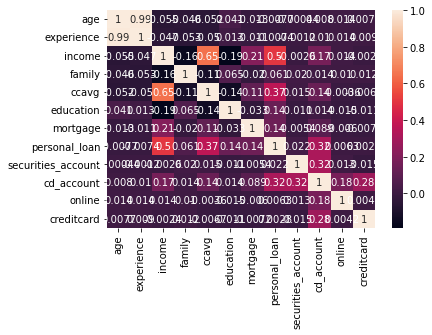

In [62]:
sns.heatmap(bl.corr(), annot=True)

<AxesSubplot:>

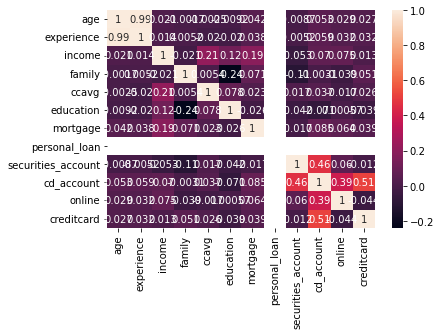

In [63]:
sns.heatmap(bl1.corr(), annot=True)

<AxesSubplot:>

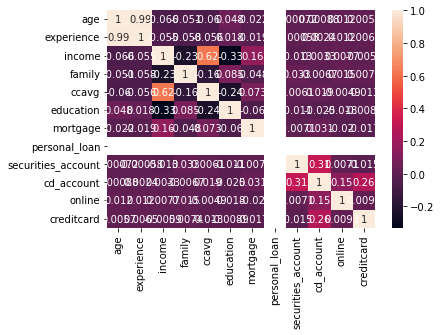

In [64]:
sns.heatmap(bl0.corr(), annot=True)

In [ ]:
#Creating a balance dataset

In [65]:
bl1_samp = bl1.sample(400)

In [66]:
bl0_samp = bl0.sample(400)

In [70]:
bldfc = pd.concat([bl1_samp, bl0_samp])

In [72]:
bldfc.shape

(800, 14)

In [73]:
bldfc['personal_loan'].value_counts()

0    400
1    400
Name: personal_loan, dtype: int64

<AxesSubplot:>

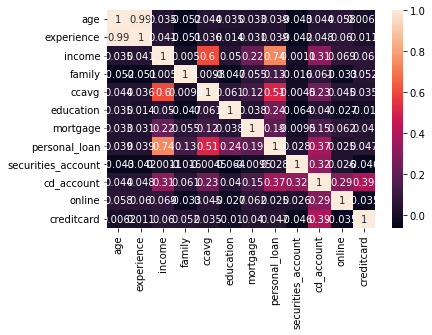

In [74]:
sns.heatmap(bldfc.corr(), annot=True)

In [75]:
bl_unseen = bldfc.sample(frac=0.20)

In [76]:
bl_train = bldfc.sample(frac=0.80)

In [77]:
bl_train.shape

(640, 14)

In [80]:
bl_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,640.0,45.093750,11.547844,23.0,35.0,45.000000,55.0,66.0
experience,640.0,19.853125,11.526943,-2.0,9.0,20.000000,30.0,41.0
income,640.0,106.259375,53.921448,8.0,59.0,109.500000,153.0,203.0
family,640.0,2.495312,1.142428,1.0,1.0,2.000000,4.0,4.0
ccavg,640.0,2.777109,2.150986,0.0,1.0,2.316667,4.1,10.0
education,640.0,2.032812,0.814876,1.0,1.0,2.000000,3.0,3.0
mortgage,640.0,78.095313,135.498645,0.0,0.0,0.000000,124.0,617.0
personal_loan,640.0,0.495312,0.500369,0.0,0.0,0.000000,1.0,1.0
securities_account,640.0,0.107813,0.310386,0.0,0.0,0.000000,0.0,1.0
cd_account,640.0,0.159375,0.366312,0.0,0.0,0.000000,0.0,1.0


In [81]:
bl_train.corr()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
age,1.000000,0.994623,0.024246,-0.044332,0.032190,0.028443,0.005841,0.017681,-0.042119,0.021989,0.046693,0.004833
experience,0.994623,1.000000,0.032158,-0.043309,0.026885,0.007178,0.009087,0.017788,-0.042807,0.028902,0.049389,0.012716
income,0.024246,0.032158,1.000000,-0.005925,0.602994,0.056542,0.226863,0.727803,-0.001486,0.313950,0.104474,0.054479
family,-0.044332,-0.043309,-0.005925,1.000000,-0.015312,-0.064555,0.063234,0.123156,-0.005193,0.065360,-0.011782,0.049166
ccavg,0.032190,0.026885,0.602994,-0.015312,1.000000,0.062734,0.083987,0.500750,-0.002041,0.234467,0.072297,0.025434
education,0.028443,0.007178,0.056542,-0.064555,0.062734,1.000000,0.046418,0.267126,-0.057320,0.045366,-0.044195,-0.021881
mortgage,0.005841,0.009087,0.226863,0.063234,0.083987,0.046418,1.000000,0.187906,0.018212,0.143435,0.063510,0.022085
personal_loan,0.017681,0.017788,0.727803,0.123156,0.500750,0.267126,0.187906,1.000000,0.038527,0.362680,0.049278,0.036897
securities_account,-0.042119,-0.042807,-0.001486,-0.005193,-0.002041,-0.057320,0.018212,0.038527,1.000000,0.330380,0.004733,-0.004159
cd_account,0.021989,0.028902,0.313950,0.065360,0.234467,0.045366,0.143435,0.362680,0.330380,1.000000,0.304152,0.410599


<AxesSubplot:>

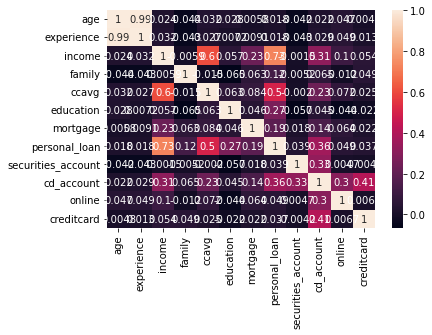

In [82]:
sns.heatmap(bl_train.corr(), annot=True)

In [86]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue='personal_loan', aspect=4)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

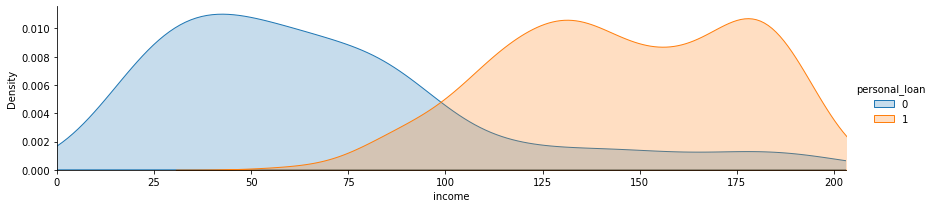

In [88]:
facetgridplot(bl_train, 'income')

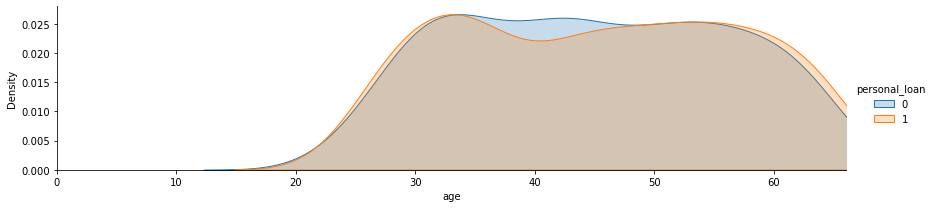

In [89]:
facetgridplot(bl_train, 'age')

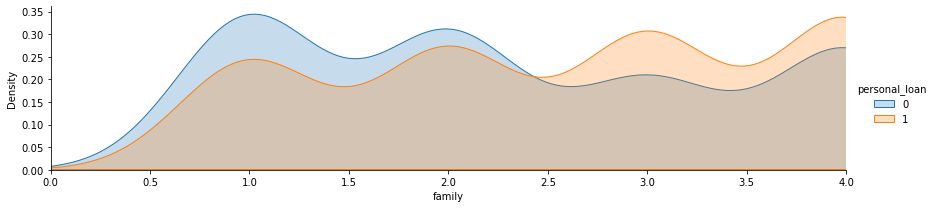

In [90]:
facetgridplot(bl_train, 'family')

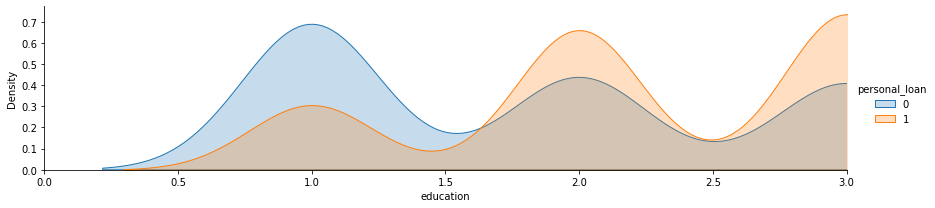

In [91]:
facetgridplot(bl_train, 'education')

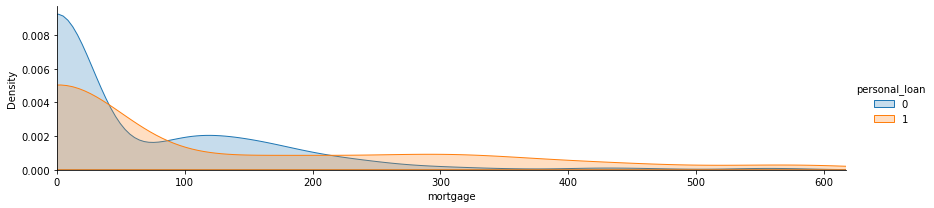

In [92]:
facetgridplot(bl_train, 'mortgage')

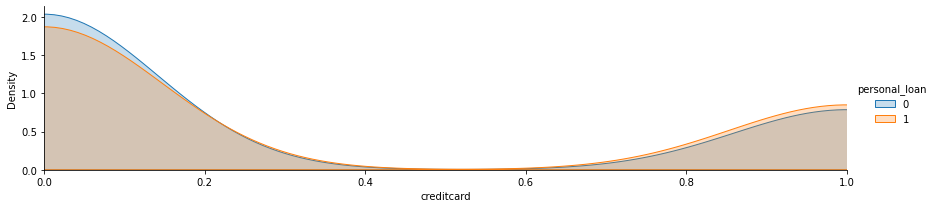

In [93]:
facetgridplot(bl_train, 'creditcard')

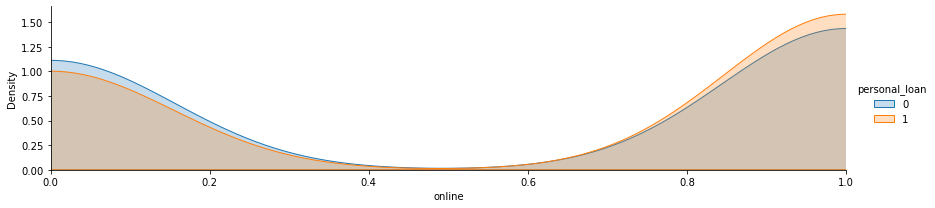

In [94]:
facetgridplot(bl_train, 'online')

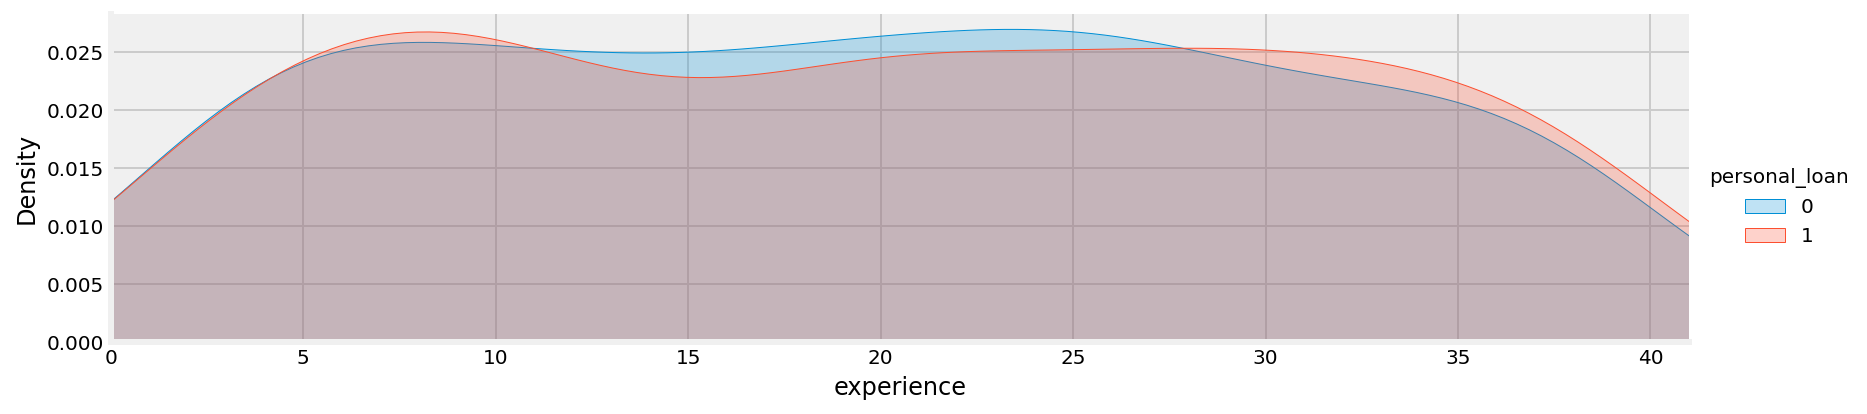

In [116]:
facetgridplot(bl_train, 'experience')

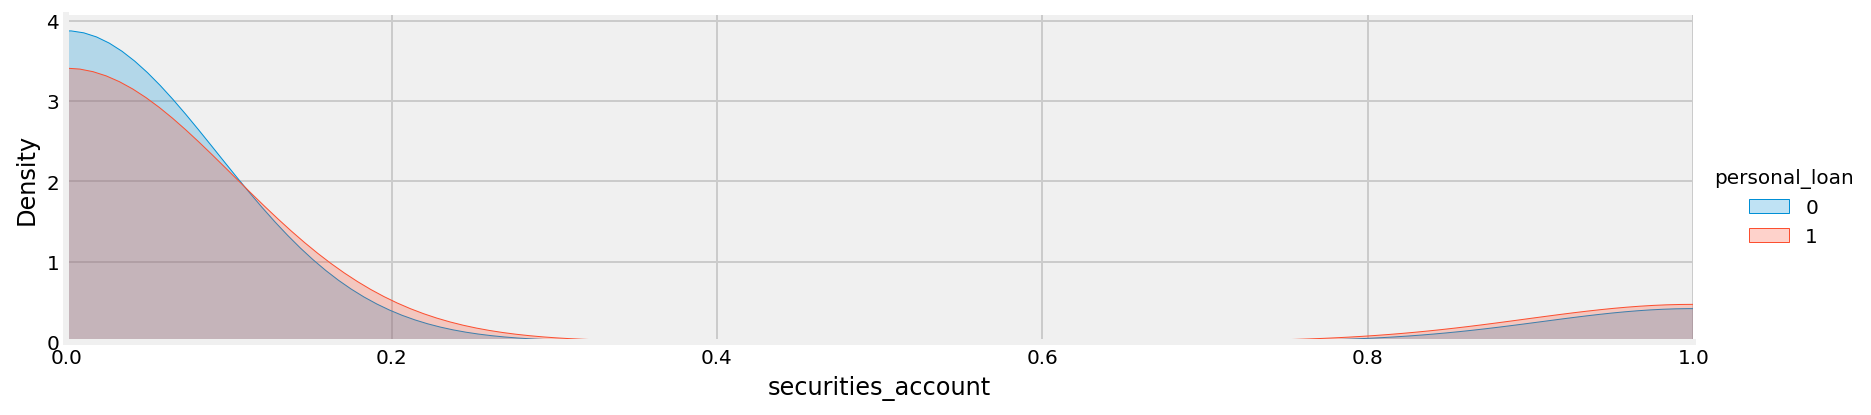

In [117]:
facetgridplot(bl_train, 'securities_account')

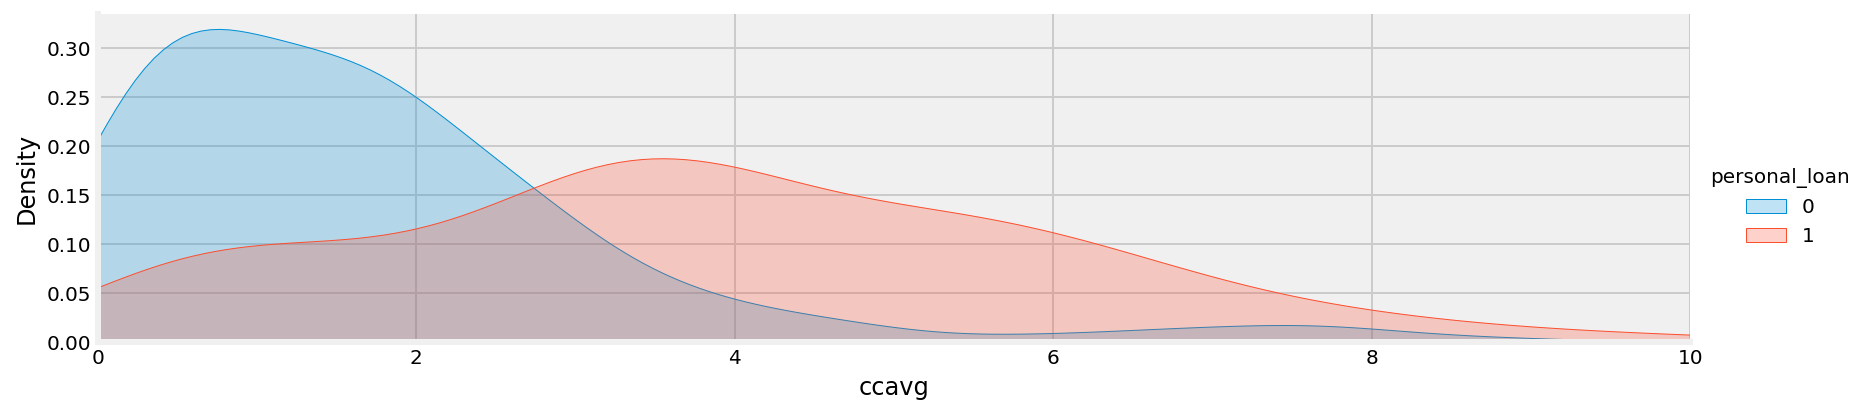

In [118]:
facetgridplot(bl_train, 'ccavg')

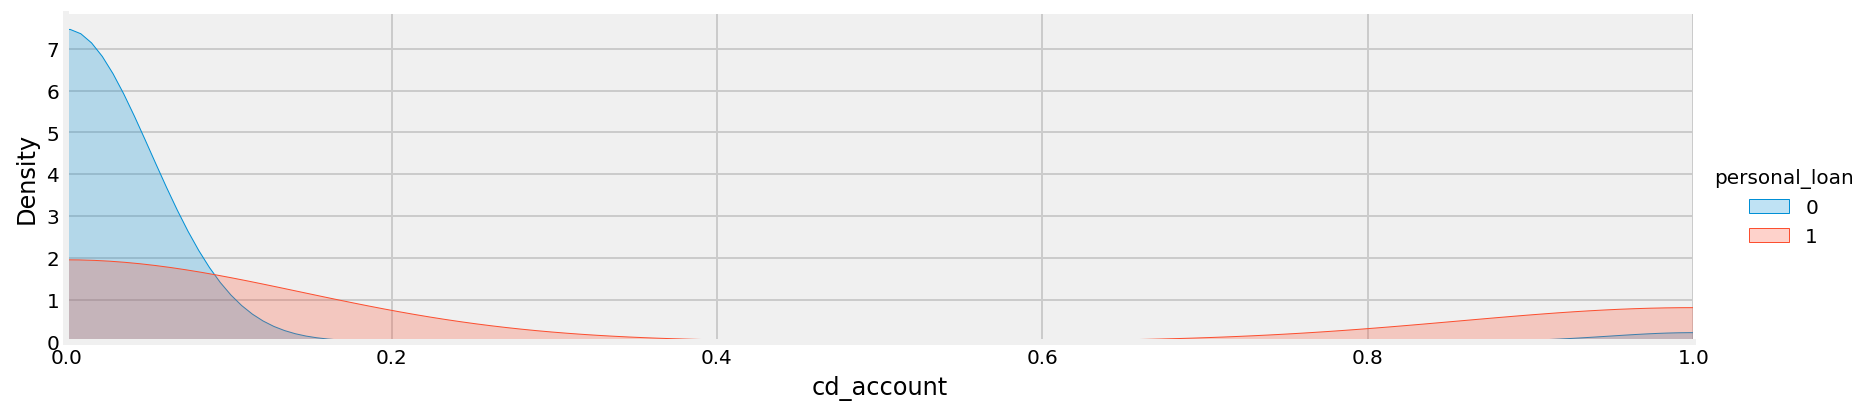

In [119]:
facetgridplot(bl_train, 'cd_account')

In [96]:
bl_train.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [105]:
target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
#Logistic Regression Model

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [108]:
print('accuracy_train = {:7.4f}'.format(lg_model.score(X_train, y_train)))

accuracy_train =  0.8984


In [109]:
print('accuracy_test = {:7.4f}'.format(lg_model.score(X_test, y_test)))

accuracy_test =  0.8984


In [110]:
#Cross validation
lg_model_score = cross_val_score(lg_model, X, y, cv=5)
lg_model_score.mean()

/Users/jesandbrett/opt/anaconda3/envs/IOD/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8796875

Accuracy is:  0.8984375
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        70
           1       0.87      0.91      0.89        58

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128



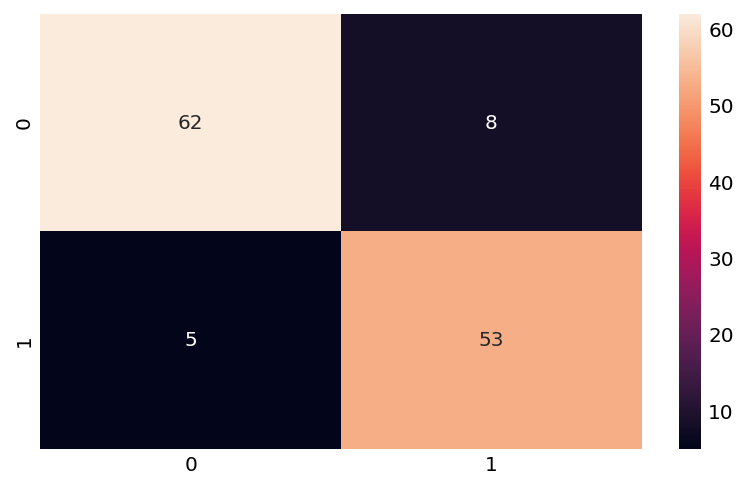

In [115]:
#Calculate the predicted labels and predicted probabilities on the test set
y_pred = lg_model.predict(X_test)

y_pp = lg_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

In [121]:
#Reduced features
target_col1 = 'personal_loan'
feature_cols1 = ['income', 'family', 'education', 'ccavg', 'mortgage',
       'cd_account', 'online']
X1 = bl_train[feature_cols1]
y1 = bl_train[target_col1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

lg_model = LogisticRegression()
lg_model.fit(X1_train, y1_train)

print('accuracy_train = {:7.4f}'.format(lg_model.score(X1_train, y1_train)))
print('accuracy_test = {:7.4f}'.format(lg_model.score(X1_test, y1_test)))

accuracy_train =  0.9062
accuracy_test =  0.8984


/Users/jesandbrett/opt/anaconda3/envs/IOD/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
lg_model_score1 = cross_val_score(lg_model, X1, y1, cv=5)
print('cross_val_score: ', lg_model_score1.mean())

cross_val_score:  0.903125


/Users/jesandbrett/opt/anaconda3/envs/IOD/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesandbrett/opt/anaconda3/envs/IOD/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Accuracy is:  0.8984375
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        70
           1       0.84      0.97      0.90        58

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.91      0.90      0.90       128



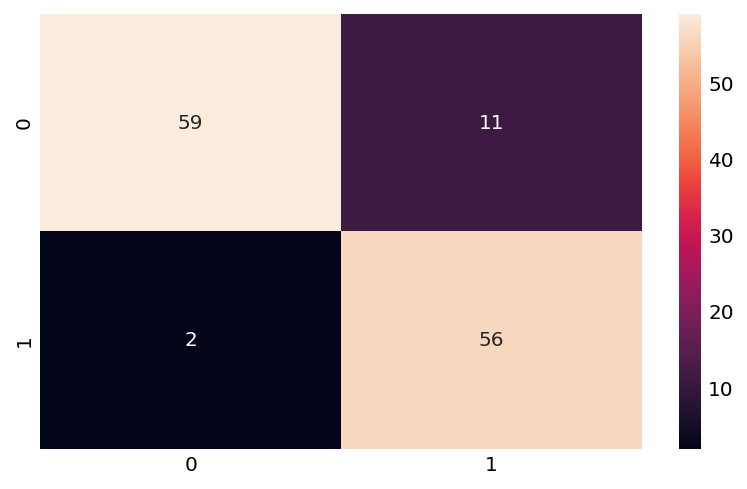

In [123]:
#Calculate the predicted labels and predicted probabilities on the test set
y1_pred = lg_model.predict(X1_test)

y1_pp = lg_model.predict_proba(X1_test)

#Create the confusion matrix
ac = accuracy_score(y1_test, y1_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y1_test, y1_pred))

In [ ]:
#Support Vector Machine
#using all features

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)
svc_model_score = cross_val_score(svc_model, X, y, cv=5)

print('accuracy_train = {:7.4f}'.format(svc_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(svc_model.score(X_test, y_test)))
print('cross_val_score: ', svc_model_score.mean())

In [ ]:
y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d");
print(classification_report(y_test, y_pred))

In [ ]:
#Reduced features
target_col1 = 'personal_loan'
feature_cols1 = ['income', 'family', 'education', 'ccavg', 'mortgage',
       'cd_account', 'online']
X1 = bl_train[feature_cols1]
y1 = bl_train[target_col1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
#Naive Bayes

